## Boom Bikes Case Study

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.
Essentially, the company wants —


- To identify the variables affecting demand of sharing the bikes etc.

- To create a linear model that quantitatively relates bike counts with variables such as temperature, months, years, days, ..

- To know the accuracy of the model, i.e. how well these variables can predict bike counts.

**So interpretation is important!**

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [662]:
import numpy as np
import pandas as pd
import matplotlib .pyplot as plt
import seaborn as sns
import datetime

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
pd.options.display.float_format = '{:.4f}'.format

In [663]:
bike = pd.read_csv("/Users/manish.konduri/Desktop/Manish_UpGrad/Linear Regression Assignment/day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.1108,18.1812,80.5833,10.7499,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.9026,17.6869,69.6087,16.6521,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.0509,9.4703,43.7273,16.6367,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.2000,10.6061,59.0435,10.7398,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.3052,11.4635,43.6957,12.5223,82,1518,1600


In [664]:
bike.shape

(730, 16)

In [665]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [666]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000
mean,365.5000,2.4986,0.5000,6.5260,0.0288,2.9973,0.6836,1.3945,20.3193,23.7263,62.7652,12.7636,849.2493,3658.7575,4508.0068
std,210.8771,1.1102,0.5003,3.4502,0.1673,2.0062,0.4654,0.5448,7.5067,8.1503,14.2376,5.1958,686.4799,1559.7587,1936.0116
min,1.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,2.4243,3.9535,0.0000,1.5002,2.0000,20.0000,22.0000
25%,183.2500,2.0000,0.0000,4.0000,0.0000,1.0000,0.0000,1.0000,13.8119,16.8897,52.0000,9.0417,316.2500,2502.2500,3169.7500
50%,365.5000,3.0000,0.5000,7.0000,0.0000,3.0000,1.0000,1.0000,20.4658,24.3682,62.6250,12.1253,717.0000,3664.5000,4548.5000
75%,547.7500,3.0000,1.0000,10.0000,0.0000,5.0000,1.0000,2.0000,26.8806,30.4458,72.9896,15.6256,1096.5000,4783.2500,5966.0000
max,730.0000,4.0000,1.0000,12.0000,1.0000,6.0000,1.0000,3.0000,35.3283,42.0448,97.2500,34.0000,3410.0000,6946.0000,8714.0000


## Step 2: Data Quality Check
Performing the Data Quality Checks

In [667]:
#Checking for Null values

bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are No Null values in the dataset

# Exploratory Data Analysis
## Step 3: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

#### Plot for Season and Count

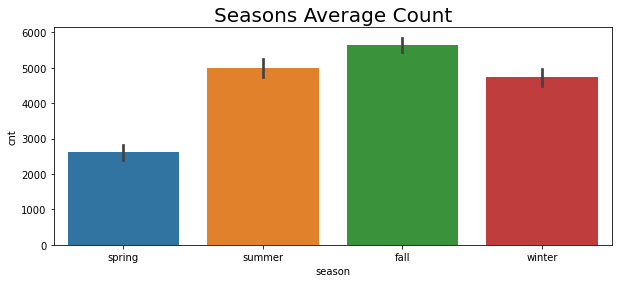

In [668]:
bike["season"] = bike[["season"]].apply(lambda x: x.map({1:"spring", 2:"summer", 3:"fall", 4:"winter"}))

plt.figure(figsize=[10,4])
sns.barplot(bike['season'],bike['cnt'])
plt.title('Seasons Average Count', fontsize = 20)
plt.show()

Bike Rentals is maximum in the seasons - fall and summer

#### Plot for Year and Count

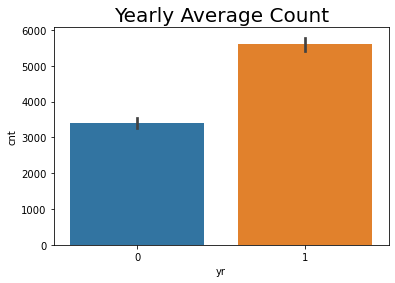

In [669]:
sns.barplot(bike['yr'],bike['cnt'])
plt.title('Yearly Average Count', fontsize = 20)
plt.show()

Bike Rentals is maximum for the year - 1 (2019)

#### Plot for Month and Count

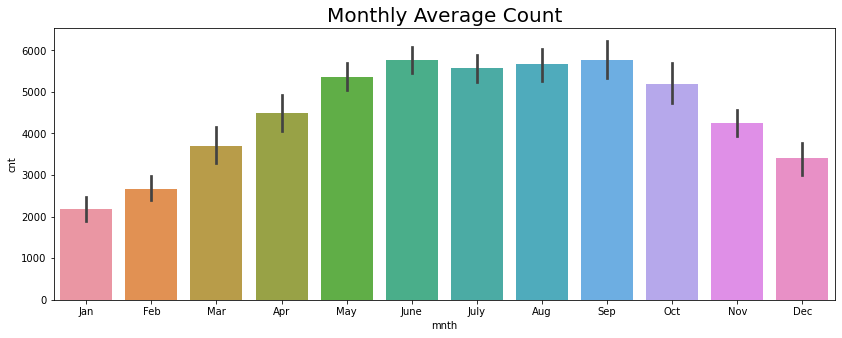

In [670]:
bike['mnth'] = bike[['mnth']].apply(lambda x: x.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}))
plt.figure(figsize=[14,5])
sns.barplot(bike['mnth'],bike['cnt'])
plt.title('Monthly Average Count', fontsize = 20)
plt.show()

Bike Rentals is maximum for the Months - June, Sep, Aug, May

#### Plot for Weekday and Count

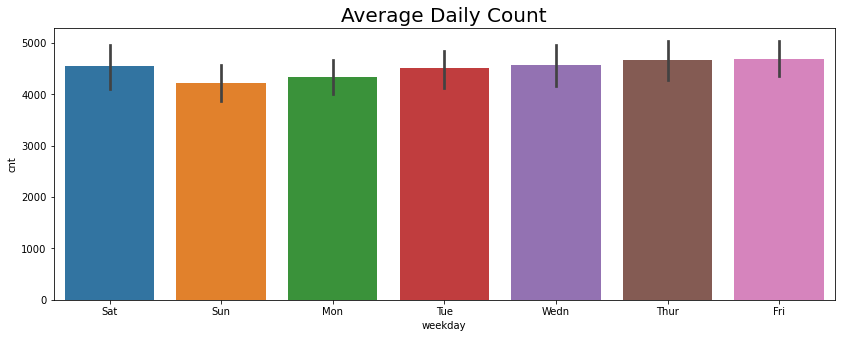

In [671]:
bike["weekday"] = bike[["weekday"]].apply(lambda x: x.map({0:"Sun",1:"Mon",2:"Tue",3:"Wedn",4:"Thur",5:"Fri",6:"Sat"}))
plt.figure(figsize=[14,5])
sns.barplot(bike['weekday'],bike['cnt'])
plt.title('Average Daily Count', fontsize = 20)
plt.show()

Bike Rentals is maximum for the weekdays - Sat, Fri, Thur

#### Plot for Weathersit and Count

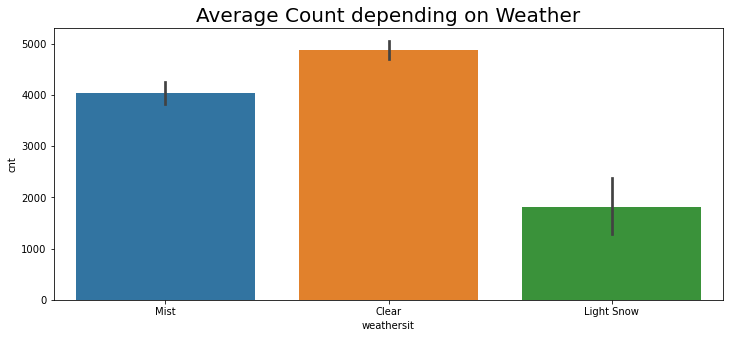

In [672]:
bike["weathersit"] = bike[["weathersit"]].apply(lambda x: x.map({1:"Clear", 2:"Mist", 3:"Light Snow", 4:"Heavy Rain"}))

plt.figure(figsize=[12,5])
sns.barplot(bike['weathersit'],bike['cnt'])
plt.title('Average Count depending on Weather', fontsize = 20)
plt.show()

Bike Rentals is maximum for the wather - Clear, Mist

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

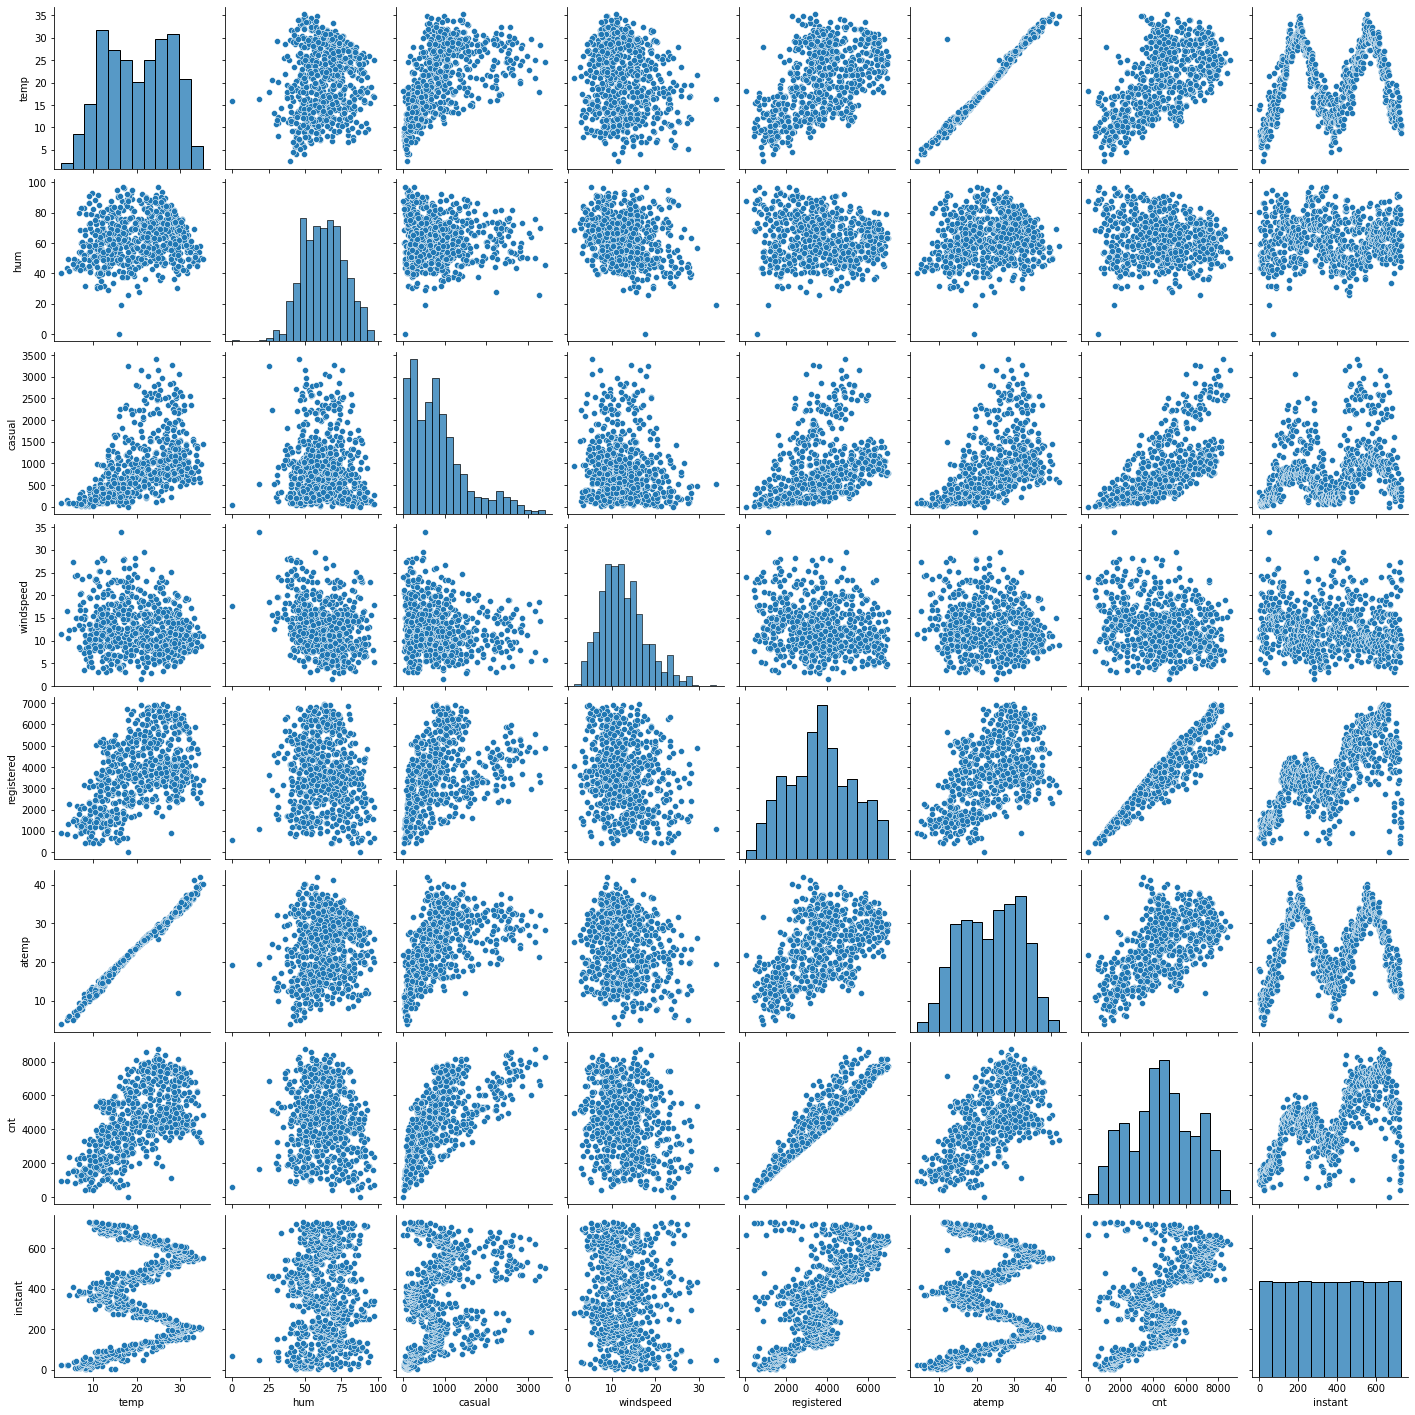

In [673]:
sns.pairplot(bike, vars=["temp", "hum",'casual','windspeed','registered','atemp','cnt','instant'])

As we can see from the graph above, there is strong correlation between the count variable and temperature, humidity and windspeed. We shall explore these correlation with different variables further.

#### Visualising the Categorical Variables

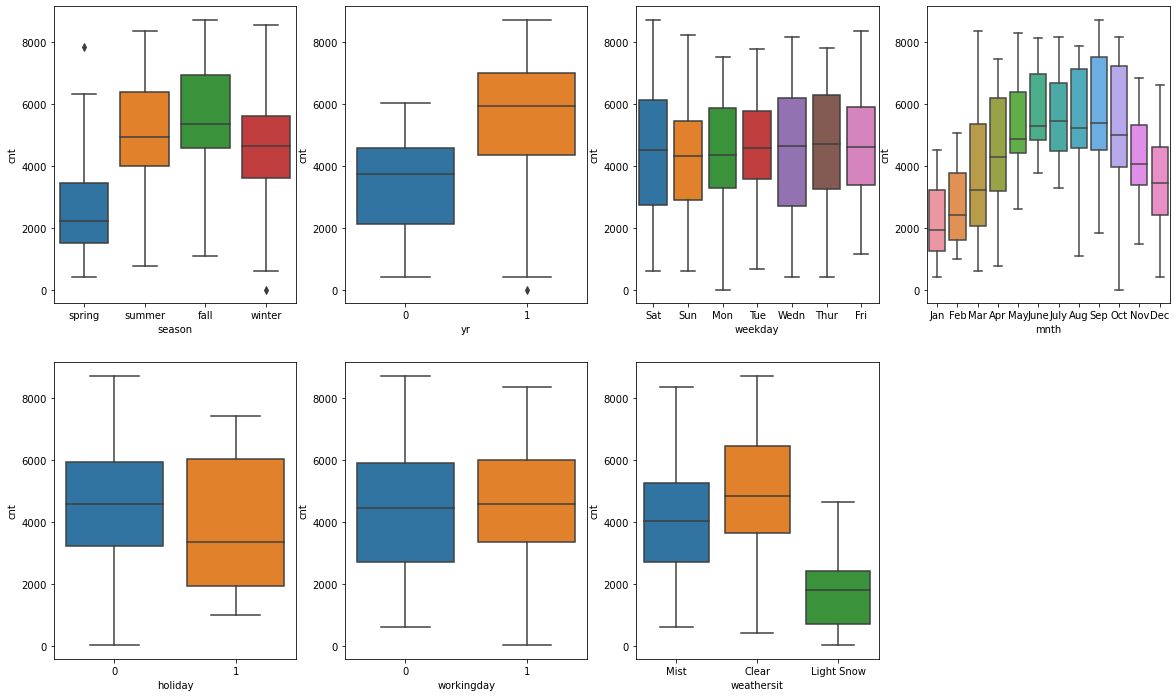

In [674]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,4,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
# plt.subplot(2,4,8)
# sns.boxplot(x = 'week', y = 'cnt', data = bike)
plt.show()

#### Observations from above graphs
1. People are renting bikes more on Summer and Fall Seasons
2. The demand/popularity of renting bikes is higher in the year 2019
3. Saturday, Wednesday, Thursday are the days where bikes are rented more
4. Months September, October, August has seen more bike rentals
5. The rentals of bikes are higher on Holidays 
6. There is no big difference in bike rental rates depending on whether it's a working day or not
7. More bike Rentals takes place in Clear weather

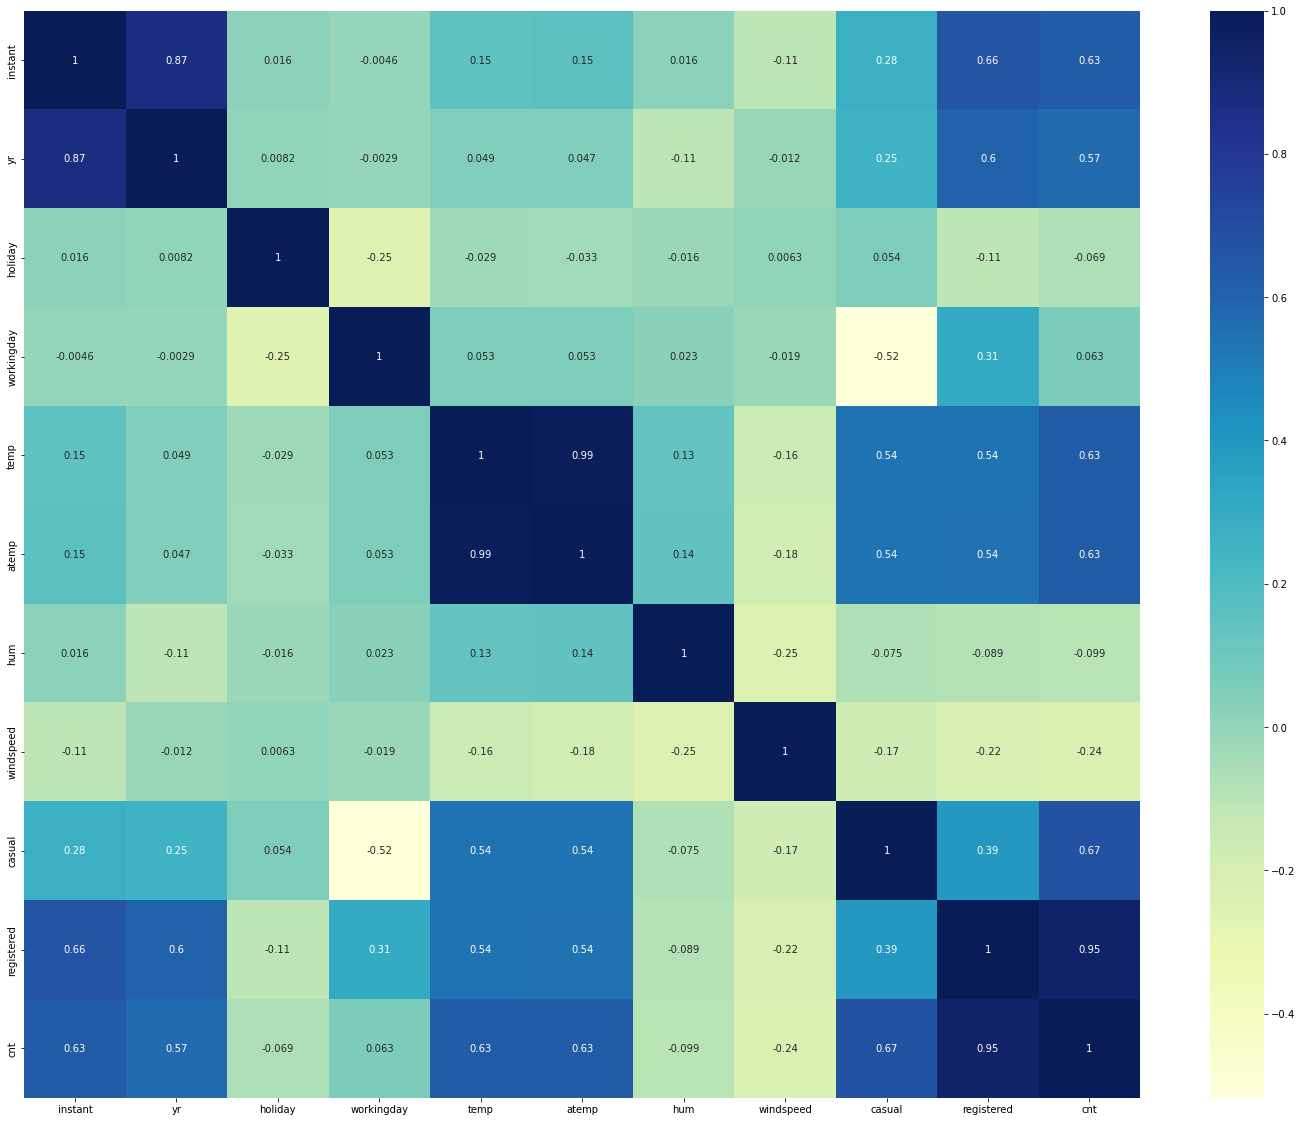

In [675]:
# Plotting a heatmap to find correlation
plt.figure(figsize = (25, 20))
sns.heatmap(bike.corr(), annot = True, cmap="YlGnBu")
plt.show()

As we can see, there are several variables correlated to count variable (cnt) such as instant, registered, casual, temp, atemp, yr, workingday, we can thereby conduct a linear regresssion model


### Deriving new variables

#### Calculation of the due point

### $ due = temp - \frac{(100 - hum)}{5} $

In [676]:
bike["due"] = bike["atemp"] - ((100 - bike["hum"]) / 5)
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,due
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Mist,14.1108,18.1812,80.5833,10.7499,331,654,985,14.2979
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Mist,14.9026,17.6869,69.6087,16.6521,131,670,801,11.6087
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.0509,9.4703,43.7273,16.6367,120,1229,1349,-1.7843
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.2000,10.6061,59.0435,10.7398,108,1454,1562,2.4148
4,5,05-01-2018,spring,0,Jan,0,Wedn,1,Clear,9.3052,11.4635,43.6957,12.5223,82,1518,1600,0.2026


#### Dropping the unnecessary variables from the Data Set

In [677]:
#dropping the variables atemp, instant, dteday, casual, registered as they are not needed for the analysis 
#atemp is not needed as temp is already being used, dteday and casual are also not required for regression analysis 

bike = bike.drop(['atemp','temp','hum', 'instant', 'dteday', 'casual', 'registered'], axis=1)
bike.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,windspeed,cnt,due
0,spring,0,Jan,0,Sat,0,Mist,10.7499,985,14.2979
1,spring,0,Jan,0,Sun,0,Mist,16.6521,801,11.6087
2,spring,0,Jan,0,Mon,1,Clear,16.6367,1349,-1.7843
3,spring,0,Jan,0,Tue,1,Clear,10.7398,1562,2.4148
4,spring,0,Jan,0,Wedn,1,Clear,12.5223,1600,0.2026


In [678]:
bike.shape

(730, 10)

In [679]:
bike.describe()

,yr,holiday,workingday,windspeed,cnt,due
count,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000
mean,0.5000,0.0288,0.6836,12.7636,4508.0068,16.2794
std,0.5003,0.1673,0.4654,5.1958,1936.0116,9.0058
min,0.0000,0.0000,0.0000,1.5002,22.0000,-8.0465
25%,0.0000,0.0000,0.0000,9.0417,3169.7500,8.9721
50%,0.5000,0.0000,1.0000,12.1253,4548.5000,17.7165
75%,1.0000,0.0000,1.0000,15.6256,5966.0000,24.0185
max,1.0000,1.0000,1.0000,34.0000,8714.0000,35.1436


### Dummy Variables

Creating Dummy variables to convert repetative Categorical values to level values

In [680]:
month = pd.get_dummies(bike["mnth"], drop_first=True)
weekday = pd.get_dummies(bike["weekday"], drop_first=True)
season = pd.get_dummies(bike["season"], drop_first=True)
weathersit = pd.get_dummies(bike["weathersit"], drop_first=True)

In [681]:
#appending dummy variables to actual data set - bike

bike = pd.concat([bike,month, weekday,season,weathersit], axis = 1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,windspeed,cnt,due,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wedn,spring,summer,winter,Light Snow,Mist
0,spring,0,Jan,0,Sat,0,Mist,10.7499,985,14.2979,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
1,spring,0,Jan,0,Sun,0,Mist,16.6521,801,11.6087,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
2,spring,0,Jan,0,Mon,1,Clear,16.6367,1349,-1.7843,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,spring,0,Jan,0,Tue,1,Clear,10.7398,1562,2.4148,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
4,spring,0,Jan,0,Wedn,1,Clear,12.5223,1600,0.2026,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0


In [682]:
# dropping the variables season,mnth,weekday,weathersit as we have created the dummies for it
bike.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
bike.head(5)

,yr,holiday,workingday,windspeed,cnt,due,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wedn,spring,summer,winter,Light Snow,Mist
0,0,0,0,10.7499,985,14.2979,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
1,0,0,0,16.6521,801,11.6087,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
2,0,0,1,16.6367,1349,-1.7843,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,0,0,1,10.7398,1562,2.4148,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
4,0,0,1,12.5223,1600,0.2026,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0


In [683]:
bike.shape

(730, 28)

In [684]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   windspeed   730 non-null    float64
 4   cnt         730 non-null    int64  
 5   due         730 non-null    float64
 6   Aug         730 non-null    uint8  
 7   Dec         730 non-null    uint8  
 8   Feb         730 non-null    uint8  
 9   Jan         730 non-null    uint8  
 10  July        730 non-null    uint8  
 11  June        730 non-null    uint8  
 12  Mar         730 non-null    uint8  
 13  May         730 non-null    uint8  
 14  Nov         730 non-null    uint8  
 15  Oct         730 non-null    uint8  
 16  Sep         730 non-null    uint8  
 17  Mon         730 non-null    uint8  
 18  Sat         730 non-null    uint8  
 19  Sun         730 non-null    u

Plotting the HeatMap again to find the correlation between the newly created variables

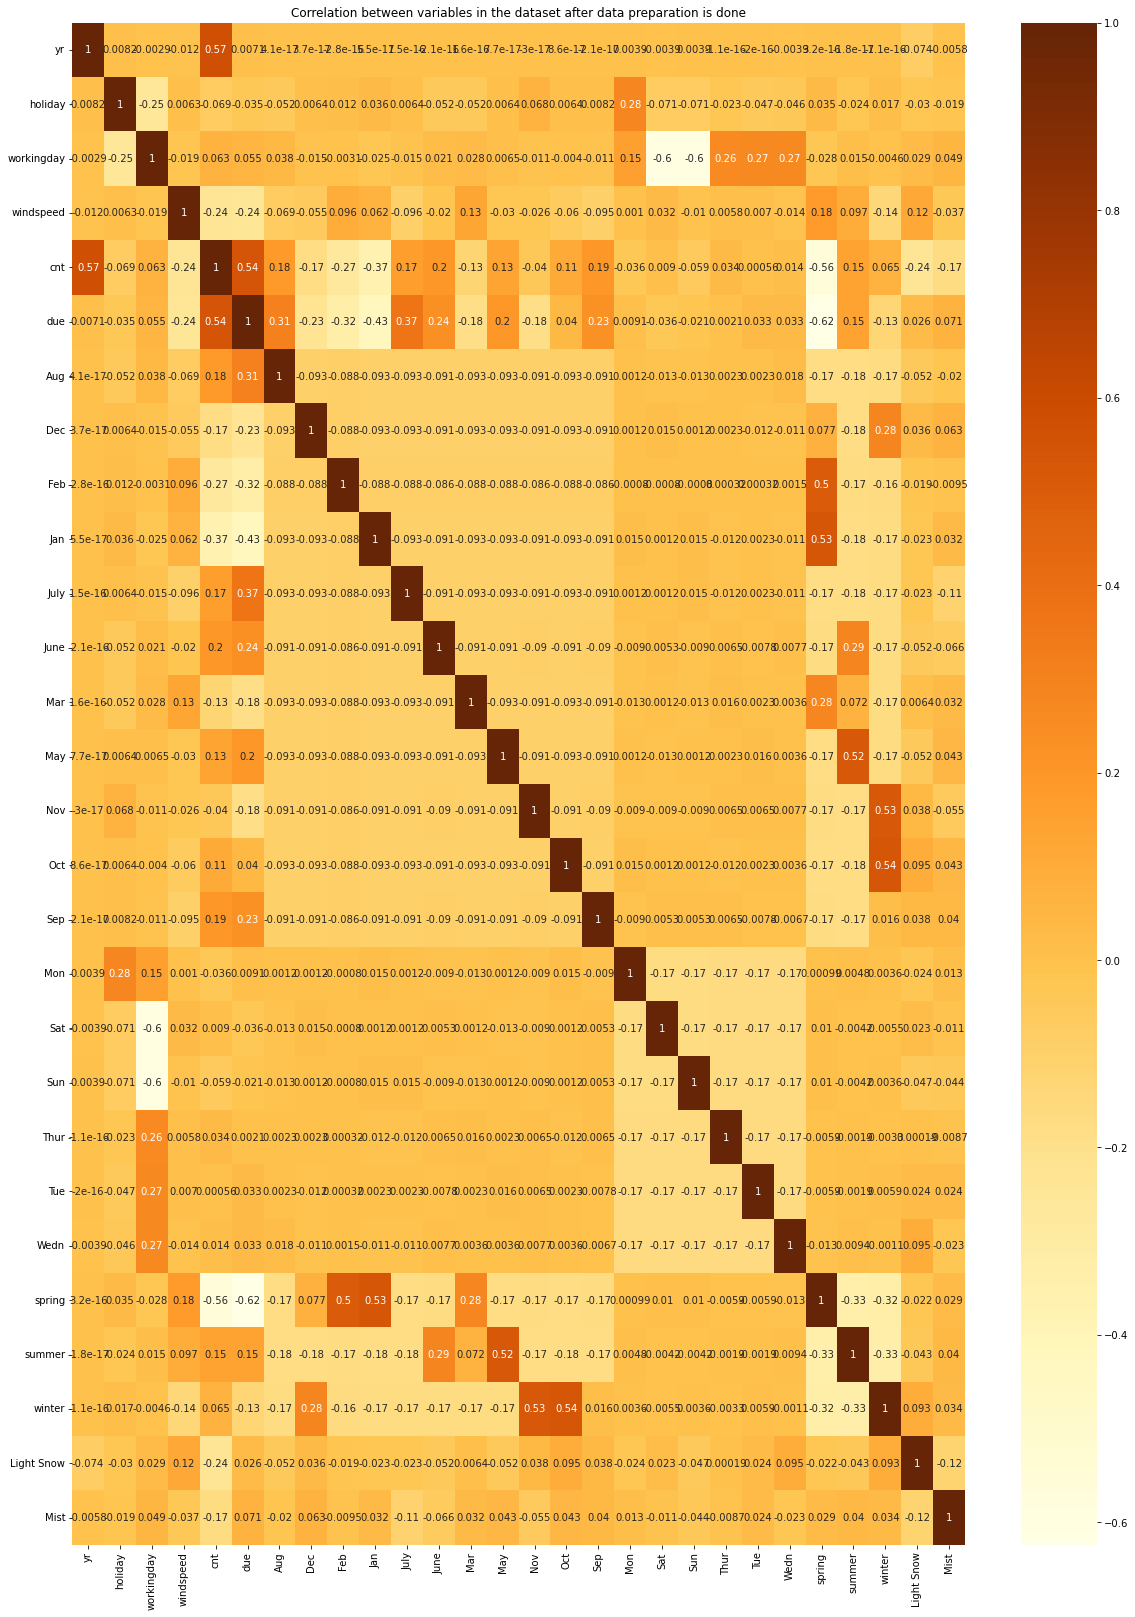

In [685]:
plt.figure(figsize=(20, 28))
sns.heatmap(bike.corr(), cmap='YlOrBr', annot=True)
plt.title('Correlation between variables in the dataset after data preparation is done')
plt.show()

## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [686]:
df_train, df_test = train_test_split(bike, train_size=0.70, random_state=100)

print(df_train.shape)
print(df_test.shape)

(510, 28)
(220, 28)


### Rescaling the Features 

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for `area`, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

#### we will use MinMax scaling.

In [687]:
scaler = MinMaxScaler()

num_vars = ['due','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,windspeed,cnt,due,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wedn,spring,summer,winter,Light Snow,Mist
576,1,0,1,0.2647,0.8277,0.8459,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.2553,0.4653,0.5071,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
728,1,0,0,0.6631,0.2041,0.2230,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
482,1,0,0,0.1885,0.4830,0.4008,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
111,0,0,1,0.3810,0.1911,0.4493,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [688]:
df_train.head()

,yr,holiday,workingday,windspeed,cnt,due,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wedn,spring,summer,winter,Light Snow,Mist
576,1,0,1,0.2647,0.8277,0.8459,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.2553,0.4653,0.5071,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
728,1,0,0,0.6631,0.2041,0.2230,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
482,1,0,0,0.1885,0.4830,0.4008,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
111,0,0,1,0.3810,0.1911,0.4493,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [689]:
df_train.describe()

,yr,holiday,workingday,windspeed,cnt,due,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wedn,spring,summer,winter,Light Snow,Mist
count,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000
mean,0.5078,0.0255,0.6765,0.3209,0.5135,0.5797,0.0961,0.0843,0.0667,0.0882,0.0765,0.0765,0.0980,0.0843,0.0863,0.0843,0.0804,0.1510,0.1549,0.1431,0.1333,0.1314,0.1588,0.2431,0.2471,0.2471,0.0294,0.3451
std,0.5004,0.1578,0.4683,0.1698,0.2244,0.2161,0.2950,0.2781,0.2497,0.2839,0.2660,0.2660,0.2977,0.2781,0.2810,0.2781,0.2722,0.3584,0.3622,0.3506,0.3403,0.3381,0.3659,0.4294,0.4317,0.4317,0.1691,0.4759
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0000,0.0000,0.0000,0.1992,0.3564,0.4101,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,1.0000,0.0000,1.0000,0.2968,0.5186,0.6145,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,1.0000,0.0000,1.0000,0.4144,0.6847,0.7663,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


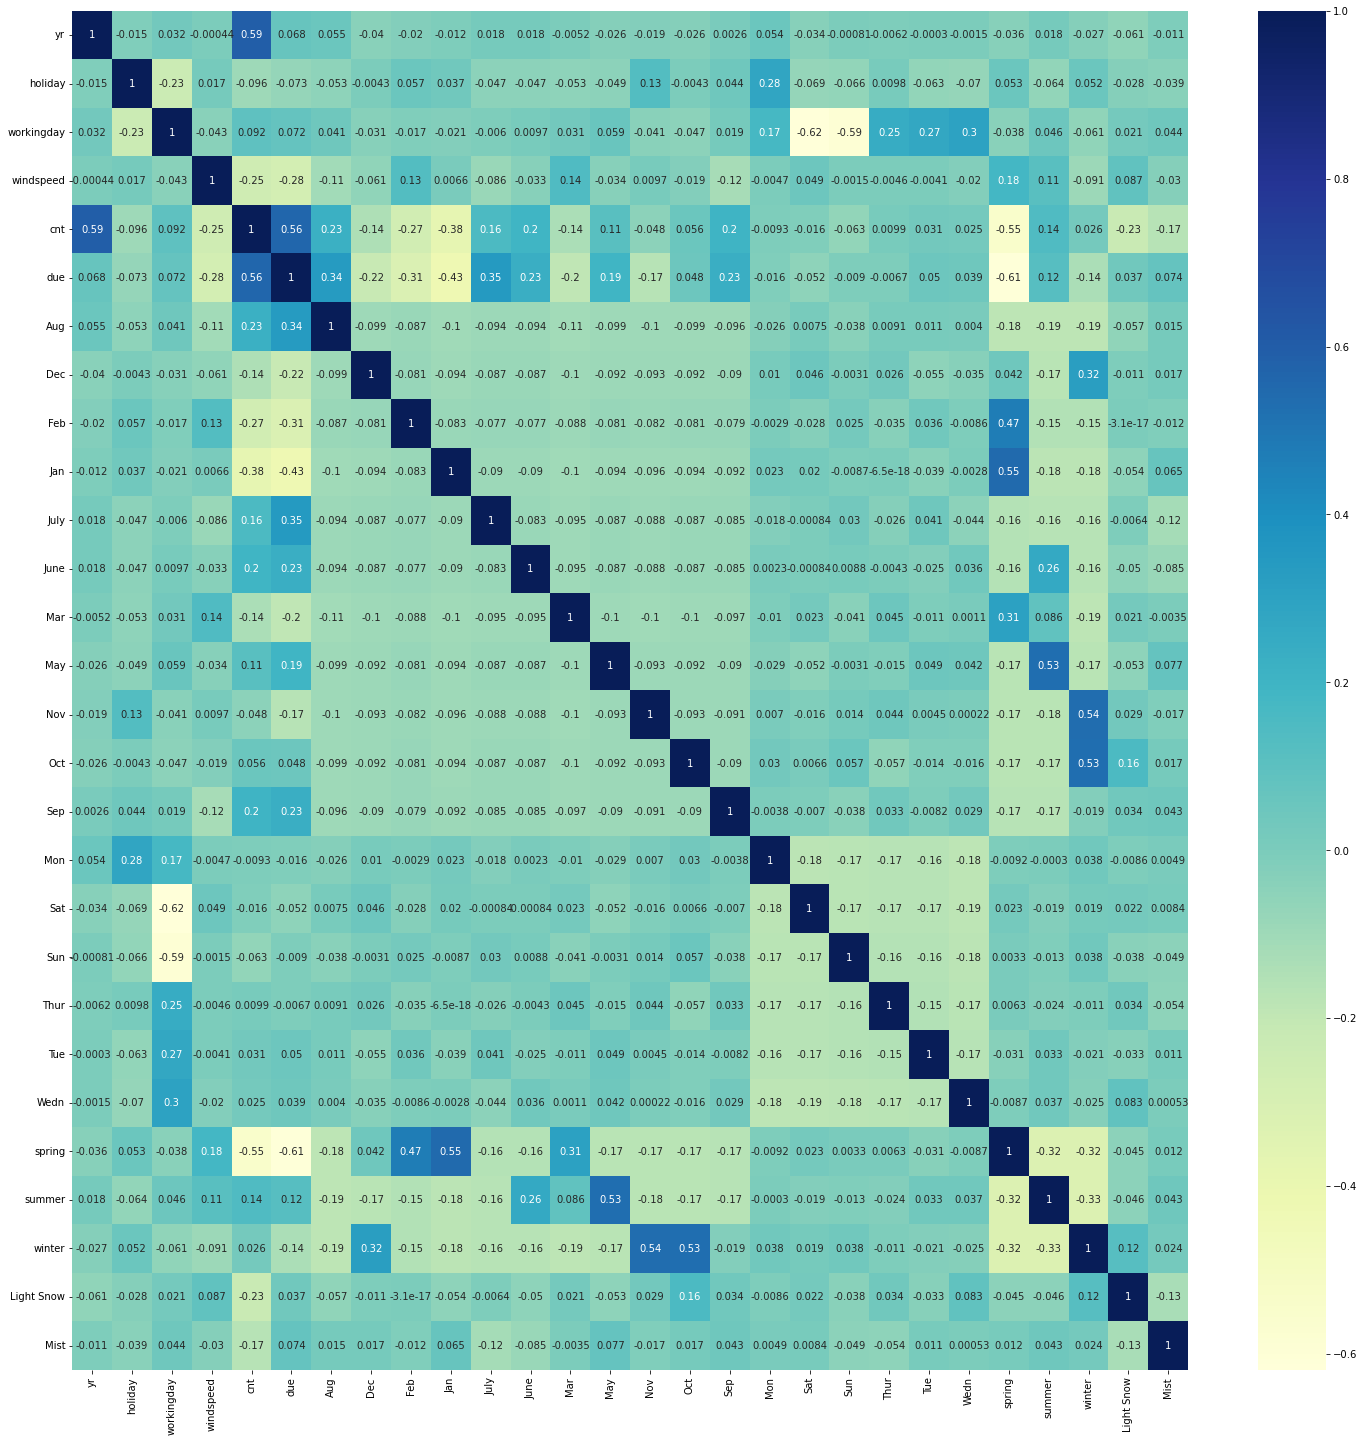

In [690]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

From the Heatmap we can see that there is a Good Relationship between cnt and temp variables

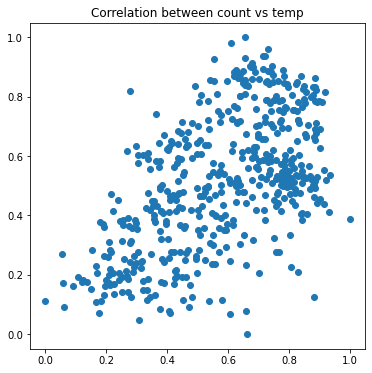

In [691]:
#checking for correlation between count and temp using a pairplot
plt.figure(figsize=[6,6])
plt.scatter(df_train.due, df_train.cnt)
plt.title('Correlation between count vs temp')
plt.show()

### Dividing into X and Y sets for the model building

In [692]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

For now we will be using RFE

Using RFE:
We have found out the R-squared values and the best fit lines using the manual approach for feature selection. We will now using the automated approach for selecting the values required for building the most optimized models and dropping the values which are redundant for our model building approach. We will now use RFE for automated approach, along with VIF to determine the variables to drop.

In [693]:
#creating the RFE object
lm = LinearRegression()
lm.fit(X_train, y_train)

#setting feature selection variables to 15
rfe = RFE(lm, n_features_to_select = 15) 

#fitting rfe ofject on our training dataset
rfe = rfe.fit(X_train, y_train)

In [694]:
#checking the elements selected and the ones rejected in a list after rfe
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 4),
 ('workingday', True, 1),
 ('windspeed', True, 1),
 ('due', True, 1),
 ('Aug', False, 2),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('July', False, 10),
 ('June', True, 1),
 ('Mar', False, 6),
 ('May', False, 3),
 ('Nov', True, 1),
 ('Oct', False, 5),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', True, 1),
 ('Sun', False, 7),
 ('Thur', False, 12),
 ('Tue', False, 9),
 ('Wedn', False, 13),
 ('spring', True, 1),
 ('summer', False, 11),
 ('winter', True, 1),
 ('Light Snow', True, 1),
 ('Mist', True, 1)]

In [695]:
#getting the selected feature variables in one one variable
true_rfe = X_train.columns[rfe.support_]

In [696]:
#checking the values of true_rfe
true_rfe

Index(['yr', 'workingday', 'windspeed', 'due', 'Dec', 'Feb', 'Jan', 'June',
       'Nov', 'Sep', 'Sat', 'spring', 'winter', 'Light Snow', 'Mist'],
      dtype='object')

In [697]:
#building model using selected RFE variables
#creating training set with RFE selected variables
X_train_rfe = X_train[true_rfe]

In [698]:
X_train_rfe.columns

Index(['yr', 'workingday', 'windspeed', 'due', 'Dec', 'Feb', 'Jan', 'June',
       'Nov', 'Sep', 'Sat', 'spring', 'winter', 'Light Snow', 'Mist'],
      dtype='object')

In [699]:
#adding constant to training variable
X_train_rfe = sm.add_constant(X_train_rfe)

#creating first training model with rfe selected variables and fitting
lr_model = sm.OLS(y_train, X_train_rfe).fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     158.6
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          8.93e-178
Time:                        23:47:18   Log-Likelihood:                 487.81
No. Observations:                 510   AIC:                            -943.6
Df Residuals:                     494   BIC:                            -875.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3146      0.028     11.130      0.000       0.259       0.370
yr             0.2426      0.008     28.822      0.000       0.226       0.259
workingday     0.0571      0.011      4.966      0.000       0.034       0.080
windspeed     -0.1402      0.027     -5.220      0.000      -0.193      -0.087
due            0.2614      0.031      8.348      0.000       0.200       0.323
Dec           -0.0896      0.019     -4.836      0.000      -0.126      -0.053
Feb           -0.0630      0.023     -2.794      0.005      -0.107      -0.019
Jan           -0.1140      0.022     -5.240      0.000      -0.157      -0.071
June           0.0361      0.017      2.153      0.032       0.003       0.069
Nov           -0.0717      0.019     -3.683      0.000      -0.110      -0.033
Sep            0.0642      0.016      3.977      0.000       0.033       0.096
Sat            0.0681      0.015      4.590      0.000       0.039       0.097
spring        -0.1108      0.018     -6.219      0.000      -0.146      -0.076
winter         0.0475      0.014      3.305      0.001       0.019       0.076
Light Snow    -0.3355      0.026    -13.086      0.000      -0.386      -0.285
Mist          -0.1010      0.009    -11.094      0.000      -0.119      -0.083
==============================================================================
Omnibus:                       89.661   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.992
Skew:                          -0.849   Prob(JB):                     1.91e-55
Kurtosis:                       5.996   Cond. No.                         17.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Notes:
1. Standard Errors assume that the covariance matrix of the errors is correctly specified.
2. The smallest eigenvalue is 3.62e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [700]:
X_train_rfe.columns

Index(['const', 'yr', 'workingday', 'windspeed', 'due', 'Dec', 'Feb', 'Jan',
       'June', 'Nov', 'Sep', 'Sat', 'spring', 'winter', 'Light Snow', 'Mist'],
      dtype='object')

In [701]:
#Removing the const variable to find the VIF values
X_train_rfe = X_train_rfe.drop(['const'], axis = 1)

In [702]:
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,due,6.2100
1,workingday,4.4900
2,windspeed,3.9400
11,spring,3.8200
12,winter,2.6300
6,Jan,2.2000
0,yr,2.0300
5,Feb,1.8700
8,Nov,1.8000
10,Sat,1.8000


#### How to check the conditions for variables elimination?
Here are some of the potential conditions which can be helpful while deciding which variables to check. These conditions are formulated after studying the VIF, p-values and going through the course content.

- High p-value, high VIF : definitely drop


- High-Low:
    1. High p, low VIF : remove these first, then build model again and check VIF again
    2. Low p, high VIF : remove these later
    
    
- Low p-value, low VIF : keep variable

#### Note :- Although the VIF for due is 6.21 we can still consider this variable because it holds the information of temperature and humidity and this is an important variable

## Step 6: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [703]:
X_train_rfe = sm.add_constant(X_train_rfe)
y_train_cnt = lr_model.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

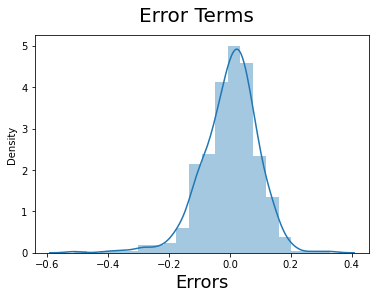

In [704]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

In [705]:
num_vars = ['due','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [706]:
df_test.describe()

,yr,holiday,workingday,windspeed,cnt,due,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wedn,spring,summer,winter,Light Snow,Mist
count,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000
mean,0.4818,0.0364,0.7000,0.3133,0.5222,0.5919,0.0591,0.0864,0.1000,0.0773,0.1045,0.0955,0.0545,0.0864,0.0727,0.0864,0.0864,0.1273,0.1182,0.1455,0.1636,0.1682,0.1000,0.2545,0.2636,0.2364,0.0273,0.3182
std,0.5008,0.1876,0.4593,0.1596,0.2192,0.2158,0.2363,0.2815,0.3007,0.2676,0.3067,0.2945,0.2276,0.2815,0.2603,0.2815,0.2815,0.3340,0.3236,0.3534,0.3708,0.3749,0.3007,0.4366,0.4416,0.4258,0.1632,0.4668
min,0.0000,0.0000,0.0000,-0.0428,0.0482,0.0412,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0000,0.0000,0.0000,0.1988,0.3786,0.4027,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,0.0000,0.0000,1.0000,0.3001,0.5247,0.6333,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,1.0000,0.0000,1.0000,0.4027,0.6777,0.7758,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,1.0000
max,1.0000,1.0000,1.0000,0.8075,0.9633,1.0357,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


#### Dividing into X_test and y_test

In [707]:
y_test = df_test.pop('cnt')
X_test = df_test

In [708]:
# Adding constant variable to test dataframe
X_test_sm = sm.add_constant(X_test)
X_test_sm = X_test_sm[X_train_rfe.columns]


In [709]:
X_train_rfe.shape

(510, 16)

In [710]:
X_test_sm.shape

(220, 16)

In [711]:
#making predictions

y_pred = lr_model.predict(X_test_sm)

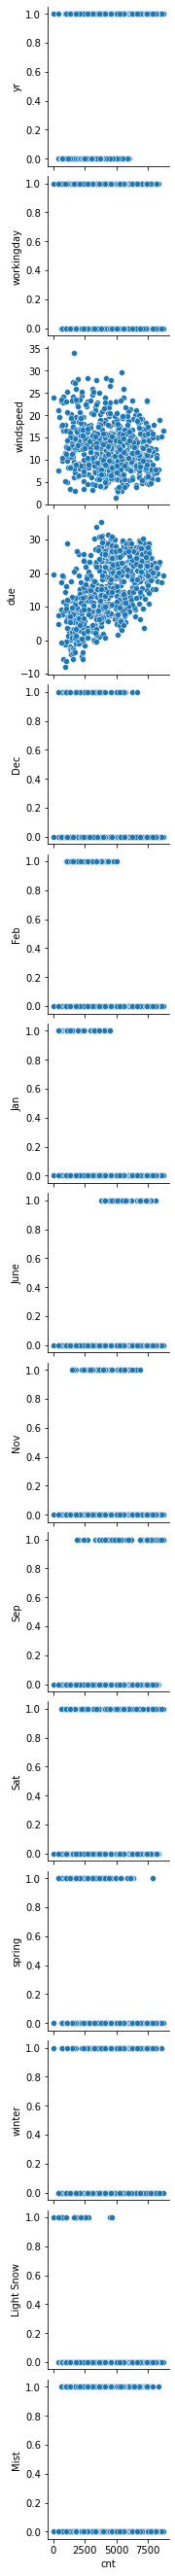

<Figure size 1152x864 with 0 Axes>

In [712]:
#build a scatter plot to observe relationship between the dependent and the feature variables
X_train_rfe = X_train_rfe.drop(['const'], axis = 1)
sns.pairplot(bike, y_vars=X_train_rfe.columns, x_vars='cnt')
plt.figure(figsize = (16, 12))
plt.show()

### Check for Homoscedasticity

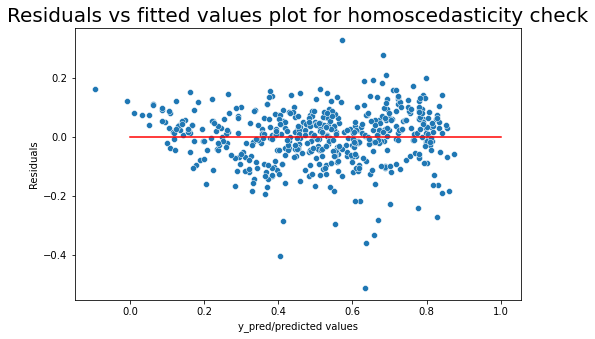

In [713]:
plt.figure(figsize = [8,5])
p = sns.scatterplot(y_train_cnt, y_train - y_train_cnt)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')

p = sns.lineplot([0,1],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check', fontsize = 20)

### Q-Q Plot

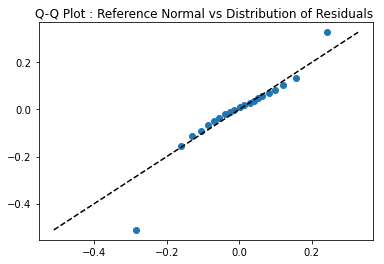

In [714]:
mean = (y_train-y_train_cnt).mean()
std = (y_train-y_train_cnt).std()

ref_normal = np.random.normal(mean,std,(y_train-y_train_cnt).shape[0])


percs = np.linspace(0,100,21)
qn_ref_normal = np.percentile(ref_normal, percs)
qn_residual = np.percentile(y_train - y_train_cnt , percs)

plt.plot(qn_ref_normal,qn_residual, ls="", marker="o")

x = np.linspace(np.min((qn_ref_normal.min(),qn_residual.min())), np.max((qn_ref_normal.max(),qn_residual.max())))
plt.plot(x,x, color="k", ls="--")
plt.title('Q-Q Plot : Reference Normal vs Distribution of Residuals ')
plt.show()

Scatterplot of residuals shows no trend. Hence the error terms have constant variance

## Step 8: Model Evaluation

Let's now plot the graph for actual versus predicted values.

#### R2 Score for Train and Test Data

In [715]:
#r2 score of the training set
r2_train = r2_score(y_true=y_train, y_pred= y_train_cnt)
print('r2 score on the train set is', r2_train)

#r2 score of the test set
r2_test = r2_score(y_true=y_test, y_pred=y_pred)
print('r2 score on the test set is', r2_test)

r2 score on the train set is 0.8280275992552238
r2 score on the test set is 0.8094331555334342


#### Adjusted R2 Score for Train and Test Data

In [716]:
n = X_train_rfe.shape[0]
p = X_train_rfe.shape[1]
print('Adjusted r2 score on the train set is', 1-(1-r2_train)*(n-1)/(n-p-1))

n1 = X_test_sm.shape[0]
p1 = X_test_sm.shape[1]
print('Adjusted r2 score on the test set is', 1-(1-r2_test)*(n1-1)/(n1-p1-1))

Adjusted r2 score on the train set is 0.822805765224512
Adjusted r2 score on the test set is 0.7944131086789266


#### Root Squared Mean Root Error

In [717]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.09545583463665232


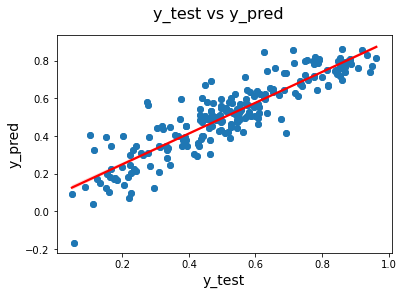

In [718]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=52, fit_reg=True, line_kws={"color": "red"})
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 16)               
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_pred', fontsize = 14) 
plt.show()

## FINAL RESULT COMPARISON:

- Test data r^2 : 80.94

- Train data r^2 : 82.80

- Test data adjusted r^2 : 79.44

- Train data adjusted r^2 : 82.28

As per our final Model, the below predictor variables influences bike booking :

- Working Day (workingday)
- Wind Speed (windspeed)
- Due (due)
- Months (Dec, Feb, Jan, June, Nov, Sep)
- Weekdays (Sat)
- Season (spring, winter)
- Weather (Light Snow, Mist)
- Year (yr)


### Linear Regression 

` cnt ` = 0.2424 * `yr` + 0.0573 * `workingday` - 0.1466 * `windspeed` + 0.2430 * `due` - 0.0902 * `Dec` - 0.0637 * `Feb` - 0.1159 * `Jan` + 0.0357 * `June` - 0.0722 * `Nov` + 0.0633 * `Sep` + 0.0683 * `Sat` - 0.1096 * `spring` + 0.0497 * `winter` - 0.3406 * `Light Snow` - 0.1023 * `Mist` + 0.3175

where due, windspeed and cnt are normalized.

Note :

- Data has been cleaned to drop outliers that might affect the model adversely
- The model has been verified for Multicollinearity effects.
- Residual Analysis has been carried out and the model satisfies the assumptions of Linear Regression (Residuals follow a normal distribution, Errors exhibit homoscedasticity)
- Q-Q plot between residual distribution and normal distribution shows that residuals follow a normal distribution for - all interpolations. Extraplorations show significant deviation, not affecting Linear Regression applicability.
- Further Lag plot shows there is no auto-correlation in data.
- Features in the order of influence has been reported by standardizing all predictor values.